In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# 1. Load the Demographic Data
print("Loading Demographic data...")
demographic_data = pd.read_excel(r"D:\Docs\EV Project\D-Behavioral segment data.xlsx")

Loading Demographic data...


In [3]:
# 2. Data Preprocessing
def preprocess_data(df):
    if df.empty:
        print("Warning: Empty dataframe received for preprocessing.")
        return df

    df = df.dropna()  # Drop missing values
    df = df.select_dtypes(include=[np.number])  # Keep numeric data only

    if df.empty:
        print("Warning: No numeric data left after dropping missing values.")
        return df

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    return pd.DataFrame(scaled_data, columns=df.columns)

demographic_data = preprocess_data(demographic_data)

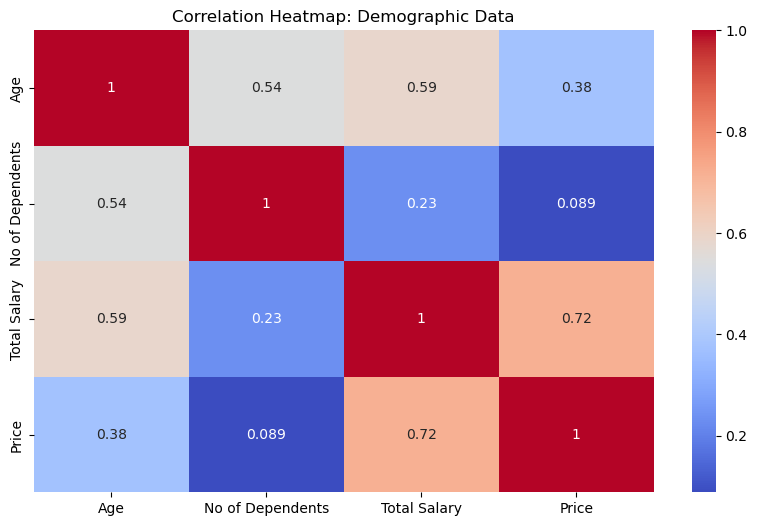

In [4]:
# 3. Correlation Heatmap
def visualize_data(df, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Heatmap: {title}")
    plt.show()

visualize_data(demographic_data, "Demographic Data")

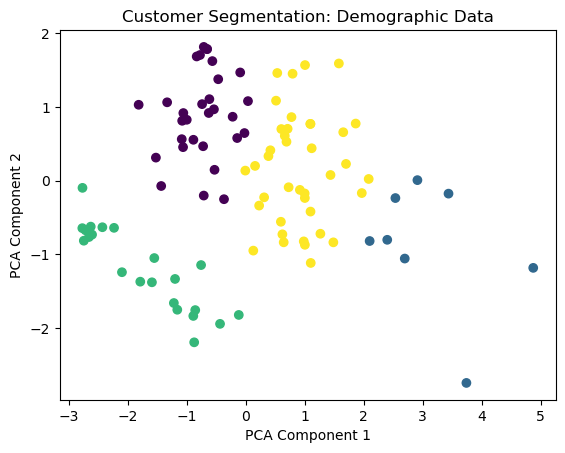

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 3, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 2, 0, 3, 0, 3, 3, 0, 3, 0, 3, 2, 3, 0, 3, 1, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3])

In [19]:
# 4. Clustering for Customer Segmentation
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows")

def perform_clustering(df, n_clusters, title):
    if df.empty:
        print(f"Warning: {title} data is empty. Skipping clustering.")
        return []

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df)
    
    # Reduce dimensions using PCA for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(df)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
    plt.title(f"Customer Segmentation: {title}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

    return clusters

n_clusters = 4
perform_clustering(demographic_data, n_clusters, "Demographic Data")